In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
x_train[444].shape

(32, 32, 3)

[9]


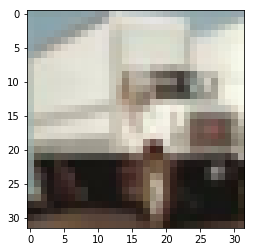

In [5]:
print(y_train[444])
plt.imshow(x_train[444]);

In [6]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [10]:
model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))
model_1.add(Activation(tf.nn.softmax))

model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 16, 16, 32)        2432      
_________________________________________________________________
activation_5 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 32)          25632     
_________________________________________________________________
activation_6 (Activation)    (None, 6, 6, 32)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 288)               0         
__________

In [12]:
batch_size = 32

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 3875s 78ms/step - loss: 2.1720 - acc: 0.2769 - val_loss: 2.1068 - val_acc: 0.3473
Epoch 2/5
50000/50000 [==============================] - 5127s 103ms/step - loss: 2.1281 - acc: 0.3249 - val_loss: 2.0867 - val_acc: 0.3689
Epoch 3/5
50000/50000 [==============================] - 5397s 108ms/step - loss: 2.1283 - acc: 0.3280 - val_loss: 2.0840 - val_acc: 0.3724
Epoch 4/5
50000/50000 [==============================] - 5442s 109ms/step - loss: 2.1240 - acc: 0.3336 - val_loss: 2.0733 - val_acc: 0.3848
Epoch 5/5
50000/50000 [==============================] - 5403s 108ms/step - loss: 2.1358 - acc: 0.3237 - val_loss: 2.1319 - val_acc: 0.3286
